<a href="https://colab.research.google.com/github/dev-EthanJ/scikit-learn_Machine_Learning/blob/main/20221115_scikit-learn_ML_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# scikit-learn Machine Learning XGBoost <br> 사이킷런 머신러닝 XGBoost

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [44]:
# https://www.kaggle.com/datasets/annavictoria/speed-dating-experiment

file_url = 'https://raw.githubusercontent.com/dev-EthanJ/scikit-learn_Machine_Learning/main/data/'
file_name = 'dating.csv'

df = pd.read_csv(file_url + file_name)

In [45]:
df.head()

,has_null,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sincere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
0,0,female,21.00,27.00,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.00,4.00,35.00,20.00,20.00,20.00,0.00,5.00,6.00,8.00,8.00,8.00,8.00,6.00,15.00,20.00,20.00,15.00,15.00,15.00,6.00,9.00,7.00,7.00,6.00,5.00,0.14,3.00,2.00,7.00,6.00,0.00,0
1,0,female,21.00,22.00,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.00,4.00,60.00,0.00,0.00,40.00,0.00,0.00,7.00,8.00,10.00,7.00,7.00,5.00,15.00,20.00,20.00,15.00,15.00,15.00,7.00,8.00,7.00,8.00,5.00,6.00,0.54,3.00,2.00,7.00,5.00,1.00,0
2,1,female,21.00,22.00,Asian/PacificIslander/Asian-American,Asian/PacificIslander/Asian-American,2.00,4.00,19.00,18.00,19.00,18.00,14.00,12.00,10.00,10.00,10.00,10.00,10.00,10.00,15.00,20.00,20.00,15.00,15.00,15.00,5.00,8.00,9.00,8.00,5.00,7.00,0.16,3.00,2.00,7.00,NaN,1.00,1
3,0,female,21.00,23.00,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.00,4.00,30.00,5.00,15.00,40.00,5.00,5.00,7.00,8.00,9.00,8.00,9.00,8.00,15.00,20.00,20.00,15.00,15.00,15.00,7.00,6.00,8.00,7.00,6.00,8.00,0.61,3.00,2.00,7.00,6.00,0.00,1
4,0,female,21.00,24.00,Asian/PacificIslander/Asian-American,Latino/HispanicAmerican,2.00,4.00,30.00,10.00,20.00,10.00,10.00,20.00,8.00,7.00,9.00,6.00,9.00,7.00,15.00,20.00,20.00,15.00,15.00,15.00,5.00,6.00,7.00,7.00,6.00,6.00,0.21,3.00,2.00,6.00,6.00,0.00,1


In [46]:
pd.options.display.max_columns = len(df.columns)

df.head()

,has_null,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sincere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
0,0,female,21.00,27.00,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.00,4.00,35.00,20.00,20.00,20.00,0.00,5.00,6.00,8.00,8.00,8.00,8.00,6.00,15.00,20.00,20.00,15.00,15.00,15.00,6.00,9.00,7.00,7.00,6.00,5.00,0.14,3.00,2.00,7.00,6.00,0.00,0
1,0,female,21.00,22.00,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.00,4.00,60.00,0.00,0.00,40.00,0.00,0.00,7.00,8.00,10.00,7.00,7.00,5.00,15.00,20.00,20.00,15.00,15.00,15.00,7.00,8.00,7.00,8.00,5.00,6.00,0.54,3.00,2.00,7.00,5.00,1.00,0
2,1,female,21.00,22.00,Asian/PacificIslander/Asian-American,Asian/PacificIslander/Asian-American,2.00,4.00,19.00,18.00,19.00,18.00,14.00,12.00,10.00,10.00,10.00,10.00,10.00,10.00,15.00,20.00,20.00,15.00,15.00,15.00,5.00,8.00,9.00,8.00,5.00,7.00,0.16,3.00,2.00,7.00,NaN,1.00,1
3,0,female,21.00,23.00,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.00,4.00,30.00,5.00,15.00,40.00,5.00,5.00,7.00,8.00,9.00,8.00,9.00,8.00,15.00,20.00,20.00,15.00,15.00,15.00,7.00,6.00,8.00,7.00,6.00,8.00,0.61,3.00,2.00,7.00,6.00,0.00,1
4,0,female,21.00,24.00,Asian/PacificIslander/Asian-American,Latino/HispanicAmerican,2.00,4.00,30.00,10.00,20.00,10.00,10.00,20.00,8.00,7.00,9.00,6.00,9.00,7.00,15.00,20.00,20.00,15.00,15.00,15.00,5.00,6.00,7.00,7.00,6.00,6.00,0.21,3.00,2.00,6.00,6.00,0.00,1


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   has_null                       8378 non-null   int64  
 1   gender                         8378 non-null   object 
 2   age                            8283 non-null   float64
 3   age_o                          8274 non-null   float64
 4   race                           8315 non-null   object 
 5   race_o                         8305 non-null   object 
 6   importance_same_race           8299 non-null   float64
 7   importance_same_religion       8299 non-null   float64
 8   pref_o_attractive              8289 non-null   float64
 9   pref_o_sincere                 8289 non-null   float64
 10  pref_o_intelligence            8289 non-null   float64
 11  pref_o_funny                   8280 non-null   float64
 12  pref_o_ambitious               8271 non-null   f

## 변수 목록
* `has_null`
    - 변수 중 Null값이 있는지 여부. 단, 이 데이터는 기존 데이터에서 일부 변수들이 생략된 축소판이기 때문에, 여기서 보이는 Null값 여부와 다소 차이가 있을 수 있음.
    - 전반적으로 무응답 항목이 있는지에 대한 정보이므로 그대로 사용
* `age` / `age_o` : age는 본인 나이이며 age_o는 상대방 나이.
* `race` / `race_o` : 마찬가지로 본인과 상대의 인종 정보.
* `importance_same_race` / `importance_same_religion`
    * 인종과 종교를 중요시 여기는지에 대한 응답
* `attractive(매력적인), sincere(성실한), intelligence(지적), funny(재미난), ambitious(야심찬), shared_ interests(공통관심사)`     
이 항목들은 4가지 관점에서 평가되어 총 변수가 24(6 × 4)개
    * `pref_o_xxx`( 예 : pref_o_attractive) : 상대방이 xxx 항목을 얼마나 중요하게 생각하는가에 대한 응답
    * `xxx_o`(예: attractive_o) : 상대방이 본인에 대한 xxx 항목을 평가한 항목
    * `xxx_important`(예 : attractive_important) : xxx 항목에 대해 본인이 얼마나 중요하게 생각하는가에 대한 응답
    * `xxx_partner`(예 : attractive_partner) : 본인이 상대방에 대한 xxx 항목을 평가한 항목
* `interests_correlate` : 관심사(취미 등) 연관도
* `expected_happy_with_sd_people` : 스피드 데이팅을 통해 만난 사람과 함께할 때 얼마나 좋을
지에 대한 기대치
* `expected_num_interested_in_me` : 얼마나 많은 사람이 나에게 관심을 보일지에 대한 기대치
* `like` : 파트너가 마음에 들었는지 여부
* `guess_prob_liked` : 파트너가 나를 마음에 들어했을지에 대한 예상
* `met`: 파트너를 스피드 데이팅 이벤트 이전에 만난 적이 있는지 여부

In [48]:
pd.options.display.float_format = '{:.2f}'.format

df.describe()

,has_null,age,age_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sincere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
count,8378.00,8283.00,8274.00,8299.00,8299.00,8289.00,8289.00,8289.00,8280.00,8271.00,8249.00,8166.00,8091.00,8072.00,8018.00,7656.00,7302.00,8299.00,8299.00,8299.00,8289.00,8279.00,8257.00,8176.00,8101.00,8082.00,8028.00,7666.00,7311.00,8220.00,8277.00,1800.00,8138.00,8069.00,8003.00,8378.00
mean,0.87,26.36,26.36,3.78,3.65,22.50,17.40,20.27,17.46,10.69,11.85,6.19,7.18,7.37,6.40,6.78,5.47,22.51,17.40,20.27,17.46,10.68,11.85,6.19,7.18,7.37,6.40,6.78,5.47,0.20,5.53,5.57,6.13,5.21,0.05,0.16
std,0.33,3.57,3.56,2.85,2.81,12.57,7.04,6.78,6.09,6.13,6.36,1.95,1.74,1.55,1.95,1.79,2.16,12.59,7.05,6.78,6.09,6.12,6.36,1.95,1.74,1.55,1.95,1.79,2.16,0.30,1.73,4.76,1.84,2.13,0.28,0.37
min,0.00,18.00,18.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.83,1.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,24.00,24.00,1.00,1.00,15.00,15.00,17.39,15.00,5.00,9.52,5.00,6.00,6.00,5.00,6.00,4.00,15.00,15.00,17.39,15.00,5.00,9.52,5.00,6.00,6.00,5.00,6.00,4.00,-0.02,5.00,2.00,5.00,4.00,0.00,0.00
50%,1.00,26.00,26.00,3.00,3.00,20.00,18.37,20.00,18.00,10.00,10.64,6.00,7.00,7.00,7.00,7.00,6.00,20.00,18.18,20.00,18.00,10.00,10.64,6.00,7.00,7.00,7.00,7.00,6.00,0.21,6.00,4.00,6.00,5.00,0.00,0.00
75%,1.00,28.00,28.00,6.00,6.00,25.00,20.00,23.81,20.00,15.00,16.00,8.00,8.00,8.00,8.00,8.00,7.00,25.00,20.00,23.81,20.00,15.00,16.00,8.00,8.00,8.00,8.00,8.00,7.00,0.43,7.00,8.00,7.00,7.00,0.00,0.00
max,1.00,55.00,55.00,10.00,10.00,100.00,60.00,50.00,50.00,53.00,30.00,10.50,10.00,10.00,11.00,10.00,10.00,100.00,60.00,50.00,50.00,53.00,30.00,10.00,10.00,10.00,10.00,10.00,10.00,0.91,10.00,20.00,10.00,10.00,8.00,1.00


## Data pre-processing

### missing value

In [49]:
df.isna().mean().sort_values(ascending=False)

expected_num_interested_in_me   0.79
shared_interests_o              0.13
shared_interests_partner        0.13
ambitous_o                      0.09
ambition_partner                0.08
met                             0.04
funny_o                         0.04
funny_partner                   0.04
guess_prob_liked                0.04
intelligence_o                  0.04
intelligence_partner            0.04
sincere_o                       0.03
sincere_partner                 0.03
like                            0.03
attractive_o                    0.03
attractive_partner              0.02
interests_correlate             0.02
pref_o_shared_interests         0.02
shared_interests_important      0.01
pref_o_ambitious                0.01
age_o                           0.01
expected_happy_with_sd_people   0.01
ambtition_important             0.01
pref_o_funny                    0.01
age                             0.01
pref_o_sincere                  0.01
pref_o_attractive               0.01
f

In [50]:
for col in df.columns:
    if df[col].isna().mean() < 0.02:
        df = df.dropna(subset=[col])

df.isna().sum()

has_null                            0
gender                              0
age                                 0
age_o                               0
race                                0
race_o                              0
importance_same_race                0
importance_same_religion            0
pref_o_attractive                   0
pref_o_sincere                      0
pref_o_intelligence                 0
pref_o_funny                        0
pref_o_ambitious                    0
pref_o_shared_interests             0
attractive_o                      176
sincere_o                         247
intelligence_o                    268
funny_o                           321
ambitous_o                        678
shared_interests_o               1029
attractive_important                0
sincere_important                   0
intellicence_important              0
funny_important                     0
ambtition_important                 0
shared_interests_important          0
attractive_p

In [51]:
missing_columns = list()

for col in df.columns:
    if df[col].isna().sum() > 0:
        missing_columns.append(col)

missing_columns

['attractive_o',
 'sincere_o',
 'intelligence_o',
 'funny_o',
 'ambitous_o',
 'shared_interests_o',
 'attractive_partner',
 'sincere_partner',
 'intelligence_partner',
 'funny_partner',
 'ambition_partner',
 'shared_interests_partner',
 'expected_num_interested_in_me',
 'like',
 'guess_prob_liked',
 'met']

In [52]:
df = df.fillna(-99)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8086 entries, 0 to 8377
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   has_null                       8086 non-null   int64  
 1   gender                         8086 non-null   object 
 2   age                            8086 non-null   float64
 3   age_o                          8086 non-null   float64
 4   race                           8086 non-null   object 
 5   race_o                         8086 non-null   object 
 6   importance_same_race           8086 non-null   float64
 7   importance_same_religion       8086 non-null   float64
 8   pref_o_attractive              8086 non-null   float64
 9   pref_o_sincere                 8086 non-null   float64
 10  pref_o_intelligence            8086 non-null   float64
 11  pref_o_funny                   8086 non-null   float64
 12  pref_o_ambitious               8086 non-null   f

In [53]:
missing_columns

['attractive_o',
 'sincere_o',
 'intelligence_o',
 'funny_o',
 'ambitous_o',
 'shared_interests_o',
 'attractive_partner',
 'sincere_partner',
 'intelligence_partner',
 'funny_partner',
 'ambition_partner',
 'shared_interests_partner',
 'expected_num_interested_in_me',
 'like',
 'guess_prob_liked',
 'met']

### Feature Engineering

- Feature: 독립변수들 + Engineering: 가공

#### `age_gap`

- `age`: 본인의 나이

- `age_o`: 상대방의 나이

In [54]:
def age_gap(row):
    # female: (age_o - age)
    if row['gender'] == 'female':
        return row['age_o'] - row['age']
    
    # male: (age - age_o)
    if row['gender'] == 'male':
        return row['age'] - row['age_o']

In [56]:
df['age_gap'] = df.apply(age_gap, axis=1)

df['age_gap'].head(10)

0   6.00
1   1.00
2   1.00
3   2.00
4   3.00
5   4.00
6   9.00
7   6.00
8   7.00
9   3.00
Name: age_gap, dtype: float64

- 나이 차이의 절대값 column 생성

In [57]:
df['age_gap_abs'] = abs(df['age_gap'])

df['age_gap_abs'].unique()

array([ 6.,  1.,  2.,  3.,  4.,  9.,  7.,  0.,  5.,  8., 12., 13., 10.,
       17., 16., 11., 14., 18., 15., 19., 20., 22., 28., 32.])

#### `same_race`

In [61]:
def check_same_race(record):
    if record['race'] == record['race_o']:
        return 1
    else:
        return -1

In [62]:
df['same_race'] = df.apply(check_same_race, axis=1)

df['same_race'].unique()

array([-1,  1])

In [63]:
df['importance_same_race'].value_counts()

1.00     2721
3.00      962
2.00      935
5.00      640
8.00      629
7.00      533
6.00      515
4.00      494
9.00      403
10.00     246
0.00        8
Name: importance_same_race, dtype: int64

In [64]:
df['same_race'].isna().sum()

0

In [65]:
'importance_same_race' in missing_columns

False

#### `same_race_point`

- `same_race_point` = `same_race` * `importance_same_race` 

    - 파생변수 `same_race_point`

In [66]:
df['same_race_point'] = df['same_race'].mul(df['importance_same_race'])

df['same_race_point'].value_counts()

-1.00     1755
1.00       966
-3.00      610
-2.00      573
2.00       362
-5.00      353
3.00       352
8.00       320
-6.00      316
-7.00      310
-8.00      309
5.00       287
-4.00      272
7.00       223
4.00       222
-9.00      210
6.00       199
9.00       193
10.00      130
-10.00     116
0.00         8
Name: same_race_point, dtype: int64

In [68]:
df[['race', 'race_o', 'same_race', 'importance_same_race', 'same_race_point']].head(10)

,race,race_o,same_race,importance_same_race,same_race_point
0,Asian/PacificIslander/Asian-American,European/Caucasian-American,-1,2.00,-2.00
1,Asian/PacificIslander/Asian-American,European/Caucasian-American,-1,2.00,-2.00
2,Asian/PacificIslander/Asian-American,Asian/PacificIslander/Asian-American,1,2.00,2.00
3,Asian/PacificIslander/Asian-American,European/Caucasian-American,-1,2.00,-2.00
4,Asian/PacificIslander/Asian-American,Latino/HispanicAmerican,-1,2.00,-2.00
5,Asian/PacificIslander/Asian-American,European/Caucasian-American,-1,2.00,-2.00
6,Asian/PacificIslander/Asian-American,European/Caucasian-American,-1,2.00,-2.00
7,Asian/PacificIslander/Asian-American,European/Caucasian-American,-1,2.00,-2.00
8,Asian/PacificIslander/Asian-American,European/Caucasian-American,-1,2.00,-2.00
9,Asian/PacificIslander/Asian-American,European/Caucasian-American,-1,2.00,-2.00


#### `rating`

- `importance` * `score` = `rate`: 파생변수

In [126]:
def rating(record, importance, score):
    # 결측치 처리
    if record[importance] == -99: return None
    if record[score] == -99: return None
    
    return record[importance] * record[score]

In [73]:
df.columns

Index(['has_null', 'gender', 'age', 'age_o', 'race', 'race_o',
       'importance_same_race', 'importance_same_religion', 'pref_o_attractive',
       'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny',
       'pref_o_ambitious', 'pref_o_shared_interests', 'attractive_o',
       'sincere_o', 'intelligence_o', 'funny_o', 'ambitous_o',
       'shared_interests_o', 'attractive_important', 'sincere_important',
       'intellicence_important', 'funny_important', 'ambtition_important',
       'shared_interests_important', 'attractive_partner', 'sincere_partner',
       'intelligence_partner', 'funny_partner', 'ambition_partner',
       'shared_interests_partner', 'interests_correlate',
       'expected_happy_with_sd_people', 'expected_num_interested_in_me',
       'like', 'guess_prob_liked', 'met', 'match', 'age_gap', 'age_gap_abs',
       'same_race', 'same_race_point'],
      dtype='object')

- 특성에 대한 상대방의 선호도

In [114]:
pref_ptnr = [col for col in df.columns if col.split('_')[0] == 'pref']

pref_ptnr

['pref_o_attractive',
 'pref_o_sincere',
 'pref_o_intelligence',
 'pref_o_funny',
 'pref_o_ambitious',
 'pref_o_shared_interests']

- (본인의) 특성에 대한 상대방의 평가

In [121]:
rate_me = [col for col in df.columns if col[-1] == 'o']

rate_me

['age_o',
 'race_o',
 'attractive_o',
 'sincere_o',
 'intelligence_o',
 'funny_o',
 'ambitous_o',
 'shared_interests_o']

In [122]:
del rate_me[0:2]

rate_me

['attractive_o',
 'sincere_o',
 'intelligence_o',
 'funny_o',
 'ambitous_o',
 'shared_interests_o']

- 특성에 대한 본인의 선호도

In [116]:
pref_me = [col for col in df.columns if col[-9:] == 'important']

pref_me

['attractive_important',
 'sincere_important',
 'intellicence_important',
 'funny_important',
 'ambtition_important',
 'shared_interests_important']

- (상대방의) 특성에 대한 본인의 평가

In [112]:
rate_ptnr = [col for col in df.columns if col[-(len('partner')):] == 'partner']

rate_ptnr

['attractive_partner',
 'sincere_partner',
 'intelligence_partner',
 'funny_partner',
 'ambition_partner',
 'shared_interests_partner']

- 평가 점수 X 중요도 = 새로운 label: `score`


In [123]:
character_list = [ch.split('_')[0] for ch in rate_ptnr]

score_ptnr = [ch + '_ptnr' for ch in character_list]
score_me = [ch + '_me' for ch in character_list]

print(score_ptnr)
print(score_me)

['attractive_ptnr', 'sincere_ptnr', 'intelligence_ptnr', 'funny_ptnr', 'ambition_ptnr', 'shared_ptnr']
['attractive_me', 'sincere_me', 'intelligence_me', 'funny_me', 'ambition_me', 'shared_me']


In [128]:
for i, j, k in zip(score_ptnr, pref_ptnr, rate_ptnr):
    df[i] = df.apply(lambda x: rating(x, j, k), axis=1)

for score in score_ptnr:
    print(df[score].head())

0   210.00
1   420.00
2    95.00
3   210.00
4   150.00
Name: attractive_ptnr, dtype: float64
0   180.00
1     0.00
2   144.00
3    30.00
4    60.00
Name: sincere_ptnr, dtype: float64
0   140.00
1     0.00
2   171.00
3   120.00
4   140.00
Name: intelligence_ptnr, dtype: float64
0   140.00
1   320.00
2   144.00
3   280.00
4    70.00
Name: funny_ptnr, dtype: float64
0    0.00
1    0.00
2   70.00
3   30.00
4   60.00
Name: ambition_ptnr, dtype: float64
0    25.00
1     0.00
2    84.00
3    40.00
4   120.00
Name: shared_ptnr, dtype: float64


In [130]:
for i, j, k in zip(score_me, pref_me, rate_me):
    df[i] = df.apply(lambda x: rating(x, j, k), axis=1)

for score in score_me:
    print(df[score].head())

0    90.00
1   105.00
2   150.00
3   105.00
4   120.00
Name: attractive_me, dtype: float64
0   160.00
1   160.00
2   200.00
3   160.00
4   140.00
Name: sincere_me, dtype: float64
0   160.00
1   200.00
2   200.00
3   180.00
4   180.00
Name: intelligence_me, dtype: float64
0   120.00
1   105.00
2   150.00
3   120.00
4    90.00
Name: funny_me, dtype: float64
0   120.00
1   105.00
2   150.00
3   135.00
4   135.00
Name: ambition_me, dtype: float64
0    90.00
1    75.00
2   150.00
3   120.00
4   105.00
Name: shared_me, dtype: float64


In [131]:
df.columns

Index(['has_null', 'gender', 'age', 'age_o', 'race', 'race_o',
       'importance_same_race', 'importance_same_religion', 'pref_o_attractive',
       'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny',
       'pref_o_ambitious', 'pref_o_shared_interests', 'attractive_o',
       'sincere_o', 'intelligence_o', 'funny_o', 'ambitous_o',
       'shared_interests_o', 'attractive_important', 'sincere_important',
       'intellicence_important', 'funny_important', 'ambtition_important',
       'shared_interests_important', 'attractive_partner', 'sincere_partner',
       'intelligence_partner', 'funny_partner', 'ambition_partner',
       'shared_interests_partner', 'interests_correlate',
       'expected_happy_with_sd_people', 'expected_num_interested_in_me',
       'like', 'guess_prob_liked', 'met', 'match', 'age_gap', 'age_gap_abs',
       'same_race', 'same_race_point', 'attractive_ptnr', 'sincere_ptnr',
       'intelligence_ptnr', 'funny_ptnr', 'ambition_ptnr', 'shared_ptnr',
       'a

### Categorical Data

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8086 entries, 0 to 8377
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   has_null                       8086 non-null   int64  
 1   gender                         8086 non-null   object 
 2   age                            8086 non-null   float64
 3   age_o                          8086 non-null   float64
 4   race                           8086 non-null   object 
 5   race_o                         8086 non-null   object 
 6   importance_same_race           8086 non-null   float64
 7   importance_same_religion       8086 non-null   float64
 8   pref_o_attractive              8086 non-null   float64
 9   pref_o_sincere                 8086 non-null   float64
 10  pref_o_intelligence            8086 non-null   float64
 11  pref_o_funny                   8086 non-null   float64
 12  pref_o_ambitious               8086 non-null   f

In [135]:
df.describe(include=['O'])

,gender,race,race_o
count,8086,8086,8086
unique,2,5,5
top,female,European/Caucasian-American,European/Caucasian-American
freq,4043,4594,4594


In [136]:
df = pd.get_dummies(df, columns=['gender', 'race', 'race_o'], drop_first=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8086 entries, 0 to 8377
Data columns (total 61 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   has_null                            8086 non-null   int64  
 1   age                                 8086 non-null   float64
 2   age_o                               8086 non-null   float64
 3   importance_same_race                8086 non-null   float64
 4   importance_same_religion            8086 non-null   float64
 5   pref_o_attractive                   8086 non-null   float64
 6   pref_o_sincere                      8086 non-null   float64
 7   pref_o_intelligence                 8086 non-null   float64
 8   pref_o_funny                        8086 non-null   float64
 9   pref_o_ambitious                    8086 non-null   float64
 10  pref_o_shared_interests             8086 non-null   float64
 11  attractive_o                        8086 no

## Training Model

### train set, test set

In [140]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['match'])
y = df['match']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=814
)

### Modeling

In [141]:
import xgboost as xgb

model = xgb.XGBClassifier(n_estimatiors=500, max_depth=5, random_state=np.random.randint(1000))

model.fit(X_train, y_train)
pred = model.predict(X_test)

pred

array([0, 0, 0, ..., 0, 0, 0])

## Evaluating Model

In [142]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# 매칭 여부
match_mean = df['match'].mean()

print(match_mean)
# 데이터의 편향성
print(1 - match_mean)
print()

print(accuracy_score(y_test, pred))

0.16547118476378928
0.8345288152362107

0.8763600395647874


### Confusion Matrix

- 1종 오류: Actual 0, Predicted 1 = False Positive(FP)
- 2종 오류: Actual 1, Predicted 0 = False Negative(FN)

In [146]:
print(confusion_matrix(y_test, pred))

[[1638   56]
 [ 194  134]]


In [147]:
cf_matrix = confusion_matrix(y_test, pred)

cf_matrix

array([[1638,   56],
       [ 194,  134]])

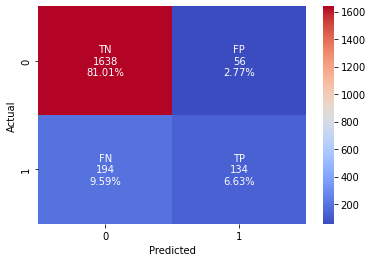

In [149]:
group_name = ['TN', 'FP', 'FN', 'TP']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percent =  ["{0:.2%}".format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f"{name}\n{count}\n{percent}" for name, count, percent
          in zip(group_name, group_counts, group_percent)]
labels = np.asarray(labels).reshape(2, 2)          

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

### `classification_report(y_true, y_pred)`

- 종속변수(y)의 값인 `0`과 `1` 각각에 대해 나타남

- 예측하려는 경우인 `1`에 대한 값을 주로 해석한다.

    - `precision`: 정밀도

    - `recall`: 재현율

    - `f1-score`: F1-점수

    - `support`: index

In [154]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1694
           1       0.71      0.41      0.52       328

    accuracy                           0.88      2022
   macro avg       0.80      0.69      0.72      2022
weighted avg       0.86      0.88      0.86      2022



#### 정밀도(precision)
* 1로 예측한 경우 중, 얼마만큼이 실제로 1인지를 나타냄<br>
$TP\over(TP+FP)$
=
$\frac{TP}{Predicted True}$
> FP(1종 오류)가 커질수록 분모가 커지기 때문에 정밀도는 낮아짐

#### 재현율(recall)
* 실제 1 중에, 얼마만큼을 1로 예측했는지 나타냄<br>
$TP\over(TP+FN)$
=
$\frac{TP}{ActualTrue}$
> FN(2종 오류)가 커질수록 분모가 커지기 때문에 재현율은 낮아짐

#### F1-점수(f1-score)
* 정밀도와 재현율의 조화평균<br>
    * 조화평균 : 주어진 수들의 역수의 산술평균의 역수   
    $H = \frac{2a_1a_2}{a_1 + a_2}$

- F1-score = $2 \times \frac{precision \times recall}{precesion + recall}$
=
$2 \times \frac{정밀도 \times 재현율}{정밀도 + 재현율}$
> 1종 오류가 중요하면 `precision`, 2종 오류가 중요하면 `recall`   
> 딱히 중요한 것 없으면 `F1-score`

## Hyperparameter tuning

### 경사하강법(Gradient descent)

- XGBoost 등에서 Machine Learning을 학습시킬 때 최소의 오차를 찾는 방법

- 오차 함수에 대한 경사도(미분계수, 기울기, Gradient)를 기준으로 매개변수를 반복해서 이동하며 오차의 최소값을 찾음

    - 매개변수: 선형 회귀에서의 계수(변수에 대한 기울기 값)

#### 경사하강법과 보폭

- Gradient Boosting의 핵심개념, model이 최소 오차값을 만드는 매개변수들을 학습하는 방법론

- 오차식에 대한 미분계수를 통해 매개변수의 이동 방향과 보폭을 결정

    - 보폭: 매개변수의 이동량

#### 미분계수(기울기)

- 평균변화율에서 x의 증가량이 0에 무한히 가까워질 때 ($x → 0$) 평균변화율 값

- 그래프상에서의 접선의 기울기, 계수

### GirdSearchCV

- 사용자가 직접 model의 hyperparameter의 값을 list로 입력하면 값에 대한 경우의 수마다    
예측 성능을 측정 평가, 비교하면서 최적의 hyperparameter 값을 찾는 과정을 진행

#### Hyperparameter 종류

- `learning_rate`(학습률) 

    - Gradient descent에서 'parameter'를 얼만큼씩 이동하면서 오차 최소값을 찾을 지 보폭의 크기를 결정

    - 기본적으로 보폭은 미분계수에 의해 결정되지만, `learning_rate`에 비례해서 보폭이 증감됨.

    - 학습률과 보폭: `learning_rate` = input → 보폭 = output
        - 과도하게 작은 `learning_rate`: 상당한 시간 소모, overfitting 발생

        - 과도하게 큰 `learning_rate`: 결여된 학습

        - 적절한 크기의 학습률을 사용해야 적당한 시간에 최소 오차 지점을 찾을 수 있음

- `max_depth`: 각 tree의 깊이 제한

- `subsample`: 모델을 학습시킬 때 전체 데이터 대비 트리에 사용할 데이터 량의 값

    - 0.5면 데이터의 절반씩 랜덤 추출

    - overfitting을 방지하는 데 도움을 준다.

- `n_estimators`: 전체 tree의 개수

In [158]:
gsCV_parameter = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.5, 0.75, 1],
    'n_estimators': [250, 500, 1000]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

model = xgb.XGBClassifier()
gs_model = GridSearchCV(model, gsCV_parameter, n_jobs=-1, scoring='f1', cv=5)

gs_model.fit(X_train, y_train)

In [ ]:
import joblib

joblib.dump(gs_model, 'XGBoost_GridSearchCV_model.pkl')

- 가장 높은 정확도의 paramter set

In [ ]:
gs_model.best_params_

In [ ]:
pred = gs_model.predict(X_test)

print("accuracy_score = ", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

### 변수의 영향력: 중요 변수 확인

In [ ]:
model = xgb.XGBClassifier(
    learning_rate=0.3, max_depth=5, n_estimators=1000, subsample=0.5, random_state=100
)

model.fit(X_train, y_train)

- 중요 변수

In [ ]:
model.feature_importances_

In [ ]:
important_feature = pd.DataFrame({'featurs': X_train.columns, 'values': model.feature_importances_})

pd.options.display.float_format = '{:.6f}'.format
important_feature.sort_values(by='values', ascending=False)

In [ ]:
plt.figure(figsize=(100, 200))

important_feature.sort_values(by='values', ascending=True).plot(kind='bar')
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(
    x='values', y='features', data=important_feature.sort_values(by='values', ascending=False).head()
)

plt.show()